In [35]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import csv 
from matplotlib.lines import Line2D


%matplotlib inline

In [36]:
sample_primordial = pd.read_csv('all_planets.csv')


In [66]:
plot4 = sample_primordial[sample_primordial['pl_bmassj'] != 0 ]
plot4 = plot4[plot4['pl_radj'] != 0 ]

plot4 = plot4.dropna(subset=['pl_bmassj', 'pl_radj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_radjerr1', 'pl_radjerr2'])

plot4 = plot4[plot4['pl_bmassjerr1'] < 1]
plot4 = plot4[plot4['pl_bmassjerr2'] < 1]

plot4 = plot4[plot4['pl_radjerr1'] < 1]
plot4 = plot4[plot4['pl_radjerr1'] < 1]



xerrmax = plot4['pl_bmassjerr1']
xerrmin = plot4['pl_bmassjerr2']

xerror = [xerrmax, abs(xerrmin)]

yerrmax = plot4['pl_radjerr1']
yerrmin = plot4['pl_radjerr2']

yerror = [yerrmax, abs(yerrmin)]


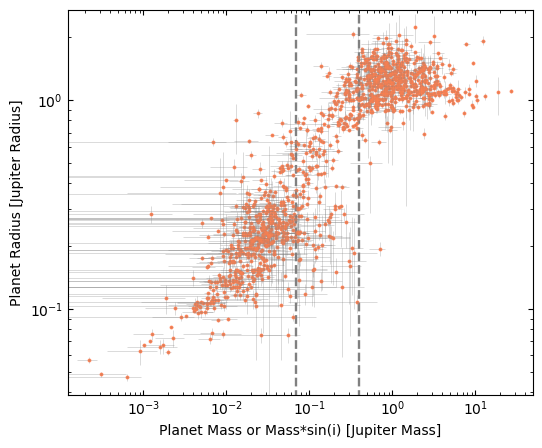

In [68]:
plt.figure(figsize=(6,5))
plt.scatter(plot4['pl_bmassj'], plot4['pl_radj'], s = 2, c = 'coral')
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xscale('log')
plt.yscale('log')

plt.vlines(0.4, 0, 50, color = 'gray', linestyle = '--', linewidth=1.7)
plt.vlines(0.0692, 0, 50, color = 'gray', linestyle = '--', linewidth=1.7)

plt.errorbar(plot4['pl_bmassj'], plot4['pl_radj'], xerr= xerror, yerr= yerror, fmt= 'o', ecolor='gray', elinewidth=0.5, alpha = .4, mfc = 'coral', mew = 0, ms = 3, )
plt.ylabel('Planet Radius [Jupiter Radius]')
plt.xlabel('Planet Mass or Mass*sin(i) [Jupiter Mass]')
plt.savefig('raio_mass.png', dpi=500)


plt.show()

In [53]:
maxi = 21.23
min = 0.00022

In [41]:
from sklearn.linear_model import LinearRegression


In [46]:
res1 = plot4[(plot4['pl_bmassj'] > 6e-5) & (plot4['pl_bmassj'] < 6e-3)]
res2 = plot4[(plot4['pl_bmassj'] > 6.311e-3) & (plot4['pl_bmassj'] < 0.408)]
res3 = plot4[(plot4['pl_bmassj'] > 0.407) & (plot4['pl_bmassj'] < 29.041)]


In [57]:
Y1 = np.log10(res1[['pl_radj']].values.reshape(-1,1))
X1 = np.log10(res1['pl_bmassj'].values.reshape(-1,1))

Y2 = np.log10(res2[['pl_radj']].values.reshape(-1,1))
X2 = np.log10(res2['pl_bmassj'].values.reshape(-1,1))

Y3 = np.log10(res3[['pl_radj']].values.reshape(-1,1))
X3 = np.log10(res3['pl_bmassj'].values.reshape(-1,1))

In [58]:
model = LinearRegression()
model.fit(X1,Y1)
Y_pred1 = model.predict(X1)

model.fit(X2,Y2)
Y_pred2 = model.predict(X2)

model.fit(X3,Y3)
Y_pred3 = model.predict(X3)

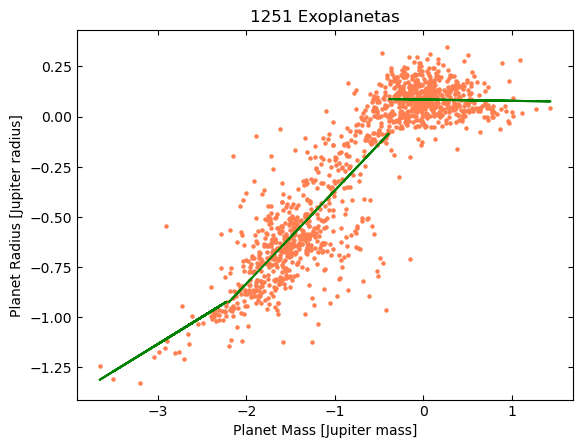

In [59]:
#plt.figure(figsize=(6,6))
plt.scatter(X1,Y1, s = 5, c = 'coral')
plt.plot(X1,Y_pred1, color ='g')

plt.scatter(X2,Y2, s = 5, c = 'coral')
plt.plot(X2,Y_pred2, color ='g')

plt.scatter(X3,Y3, s = 5, c = 'coral')
plt.plot(X3,Y_pred3, color ='g')



plt.title(f'{len(plot4)} Exoplanetas')
plt.xlabel("Planet Mass [Jupiter mass]")
plt.ylabel("Planet Radius [Jupiter radius]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)